<img src="https://communications.tulane.edu/sites/default/files/TUlogo2020.png" alt="drawing" width="20%"/> 
<center><h1>E-commerce business data analysis</h1></center>

<center><h3> by Lorena Peñuela Cantor </h3></center>

<center><h3><a href="https://lpenuelac.github.io">Website</a></h3></center>




<a name="content"></a>
# **Content**
1- [Goal](#goal)  
2-  [Collaboration Plan](#collaboration)  
3 -  [Datasets](#datasets)  
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1-   [Exploratory data analysis](#EDA)  
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1.1-   [Customers](#customers)  
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1.2-   [Sellers](#sellers)  
4 -  [Next steps](#next)  


<a name="goal"></a>
# **Goal**

The main goal of this project is to use the data from the the brazilian company [Olist](https://olist.com/pt-br/) to identify buying patterns that allow generating knowledge about its operations and add value to the business; through the extraction, analysis, and visualization of data.

<a name="collaboration"></a>
# **Collaboration Plan**

This work will be carried out solely by me as a master's student, based on what I learned in the Introduction to Data Science classes and the feedback received by Dr. Nicholas Mattei as professor of the course.

This project is developed using python as programming language, Google Colab as development environment and GitHub as code repository and web server.

<a name="datasets"></a>
# **Datasets**

This dataset is in [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)
On the web page you can also find the data model, which is important to understand the relationship that exists between the different datasets.

![image](https://i.imgur.com/HRhd2Y0.png)

There are eight datasets with the following data:


1.   olist_order_payments_dataset: It includes the payment option and the number of installments if it is a credit card.
2.   olist_orders_dataset: It relates all the information of an order, including delivery date, purchase date, and approved date. 
3.  olist_order_reviews_dataset: At the end of a purchase, Olist sends a customer survey that allows capturing the customer's satisfaction with their purchase. This information is stored in this dataset
4. olist_order_customer_dataset (as olist_customers_dataset): It stores data related to the customers and their locations as state, city and zip code.
5. olist_products_dataset: It stores data related to the products sold by Olist.
6. olist_order_items_dataset: An order could have more than one product. Then, this dataset stores all the products purchased in a order. 
7. olist_sellers_dataset: It stores the data related to the sellers and their locations as state, city, and zip code.
8. olist_geolocation_dataset: It relates the Brazilian zip codes to latitude and longitude. 




<a name="EDA"></a>
## **Exploratory data analysis**

One of the business questions that I would like to delve into is whether the location of customers and vendors affects sales or the products purchased, so I will mainly analyze the related data sets of customers and sellers as well as the datasets that allow them to be related.
For this, it is necessary to know how the buyers are distributed, how the sellers are distributed, and how the delivered orders are distributed.

In [79]:
#Reading the main datasets related to the bussiness question. 
import pandas as pd
import matplotlib.pyplot as plt
customers = pd.read_csv("../data/olist_customers_dataset.csv")
sellers =  pd.read_csv("../data/olist_sellers_dataset.csv")
#This dataset is useful to make a map based geometries
#For the visualization, geopandas is required
# See how to install it https://geopandas.org/en/stable/getting_started/install.html
import geopandas as gpd
locations =  gpd.read_file("zip://../data/states.zip")
#Ignoring user warnings about KMeans memory leak
import warnings
warnings.filterwarnings('ignore')

<a name="customers"></a>
### **Customers**

In [25]:
#The data availabe for the customers
customers.head(4)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP


In [20]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In this case, the customers have 5 variables and all of them are correctly identified. 

In [27]:
#The dataset doesn't have null or nan values
customers.isnull().count()
customers.isna().count()

customer_id                 99441
customer_unique_id          99441
customer_zip_code_prefix    99441
customer_city               99441
customer_state              99441
dtype: int64

An important feature of this dataset is that two identifiers are found. The `customer_id` represents an identifier of the client within the orders, that is to say, that a client can have several `customer_id` if she has made several orders, while she only has a `customer_unique_id`.
So we are interested in knowing the number of customers of the company and if their location remains the same in each order

In [32]:
#Total of rows in the customers dataframe
display("Number of no unique customers",customers.shape[0])
#Total of rows with unique id of the customers dataframe
display("Number of customers",len(pd.unique(customers["customer_unique_id"])))

'Number of no unique customers'

99441

'Number of customers'

96096

This means that about 3000 records refer to customers who have made repurchases

In [100]:
#Getting the number number of ids (or orders) created by one user
customers_by_orders = customers.groupby("customer_unique_id").count()["customer_id"].reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
#Customers who purchased one order
customers_one_order=customers_by_orders.loc[customers_by_orders["count"]==1]["customer_unique_id"]
# Obtaining clients who do not change their location
unduplicated_customers = customers[~customers.duplicated(subset=["customer_unique_id","customer_city","customer_zip_code_prefix","customer_state"],keep=False)]
# Removing customers of a single purchase to get customers who have different locations
customers_different_location = unduplicated_customers.loc[~unduplicated_customers["customer_unique_id"].isin(customers_one_order)]

In [99]:
#One example of a customer who has two different locations
customers.loc[customers["customer_unique_id"]=="d55417a83a73d1702b43988e63f0731a"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
387,13e8265ea7e8a11df7a56799f5806220,d55417a83a73d1702b43988e63f0731a,8576,itaquaquecetuba,SP
56661,ee910160bbbdf7ba4b1dbd4dbc1db3ae,d55417a83a73d1702b43988e63f0731a,3613,sao paulo,SP


Taking into account the above, it is observed that although a client may have more than one location and there is no way of knowing which is its residence, it is feasible to obtain the distribution of the location of the customers without taking into account whether it is unique or not. In the end, we want to know if there is a pattern from where the delivery of the order was made and the location of the sellers.

In [81]:
#Cleaning geometry dataset to get the geometry and the acronym of each state
#and deleting additional variables.
locations[['COUNTRY','STATE']] = locations['HASC_1'].str.split('.',expand=True)
locations = locations.drop(columns=["ID_0","ISO","NAME_0","ID_1","CCN_1","CCA_1","TYPE_1","ENGTYPE_1","NL_NAME_1","VARNAME_1","COUNTRY","HASC_1"])
locations = locations.rename(columns ={'NAME_1':'NAME'})
locations.head(5)

,NAME,geometry,STATE
0,Acre,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350...",AC
1,Alagoas,"MULTIPOLYGON (((-35.90153 -9.86180, -35.90153 ...",AL
2,Amapá,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0...",AP
3,Amazonas,"POLYGON ((-67.32623 2.02968, -67.30118 1.92997...",AM
4,Bahia,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708...",BA


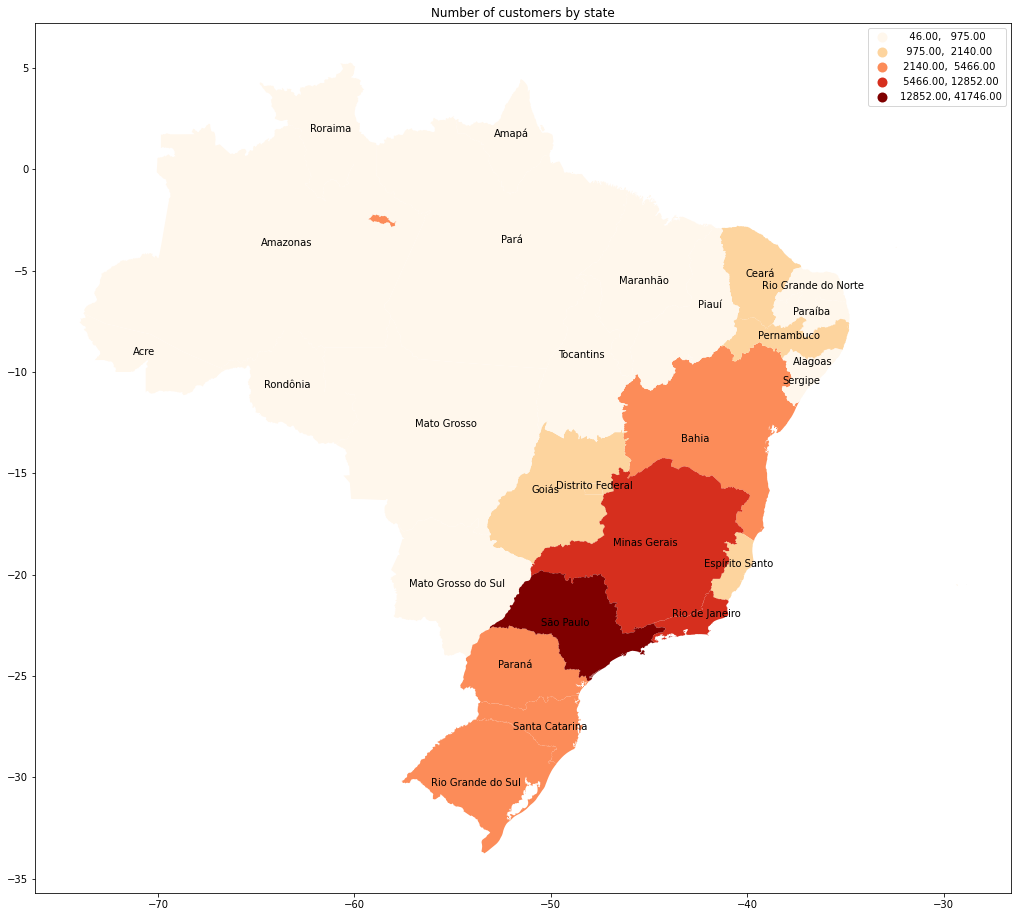

In [82]:
#Visualizing customers by state
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
#defining the figure to create
fig, ax = plt.subplots(1, 1,figsize=(20, 16))
#Joining geometries and number of customers
customer_state = pd.DataFrame(customers.groupby("customer_state").count()["customer_id"])
location_customers=locations.merge(customer_state,left_on="STATE",right_on="customer_state")
#Defining coords for set the label on each state
location_customers["coords"] = location_customers["geometry"].apply(lambda x: x.representative_point().coords[:])
location_customers["coords"] = [coords[0] for coords in location_customers["coords"]]
#Plotting data
location_customers.plot(column='customer_id',ax=ax, cmap='OrRd', scheme='natural_breaks',
           legend=True)
ax.set_title("Number of customers by state")
for idx, row in location_customers.iterrows():
    ax.annotate(row['NAME'], xy=row["coords"], horizontalalignment="center", color="black")


For this case, it is observed that the SP (São Paulo) state is where more orders are delivered, and there is more presence of clients in the south of the country

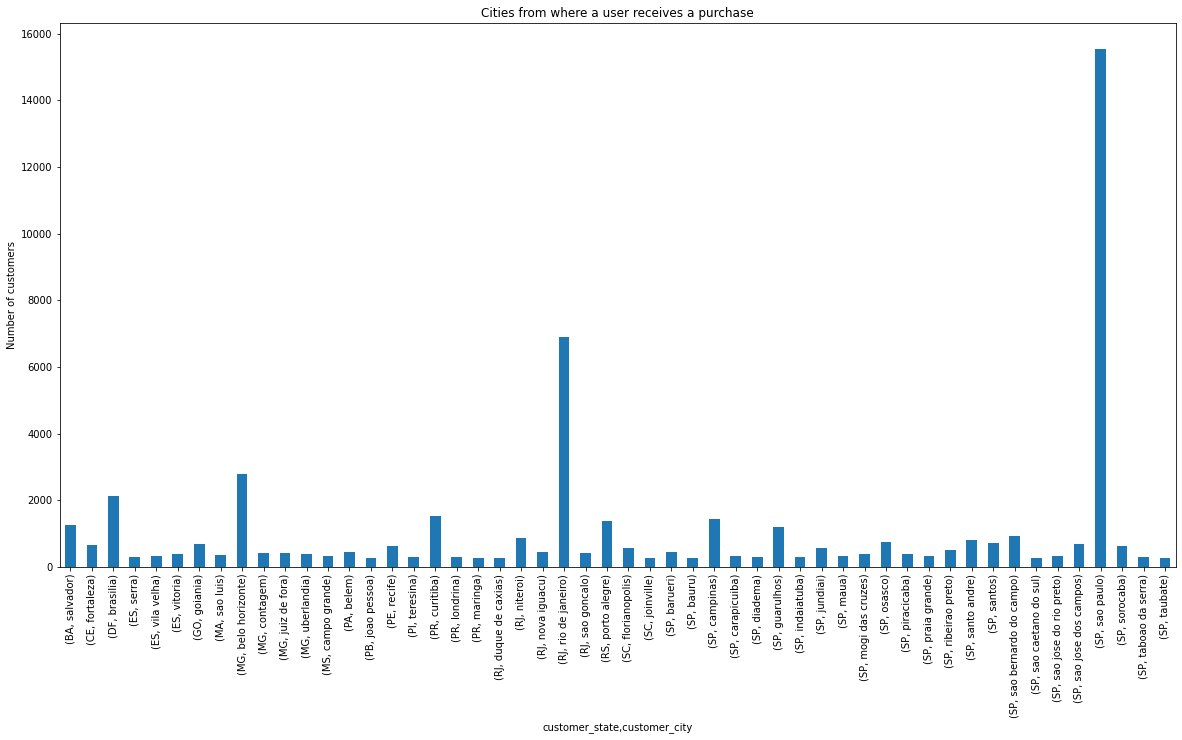

In [135]:
#Visualizing customers by city

customers_city_state= customers.groupby(["customer_state","customer_city"]).count()
customers_city_state.loc[customers_city_state["customer_id"]>250]["customer_id"].plot.bar(title="Cities from where a user receives a purchase",ylabel="Number of customers",figsize=(20, 10))

For display purposes, cities with more than 250 customers who have received an order are selected. Additionally, Sao Paulo was observed as the city where most purchases are received, followed by Rio de Janeiro, which correspond to the most populated cities in Brazil.

<a name="sellers"></a>
### **Sellers**

In [139]:
#Visualizing the sellers dataframe
sellers.head(4)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP


In [137]:
#The variables are correctly defined
sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [145]:
#There are no seller duplicates 
sellers.seller_id.is_unique

True

Unlike buyers, sellers have a single location so it is possible to see their distribution directly


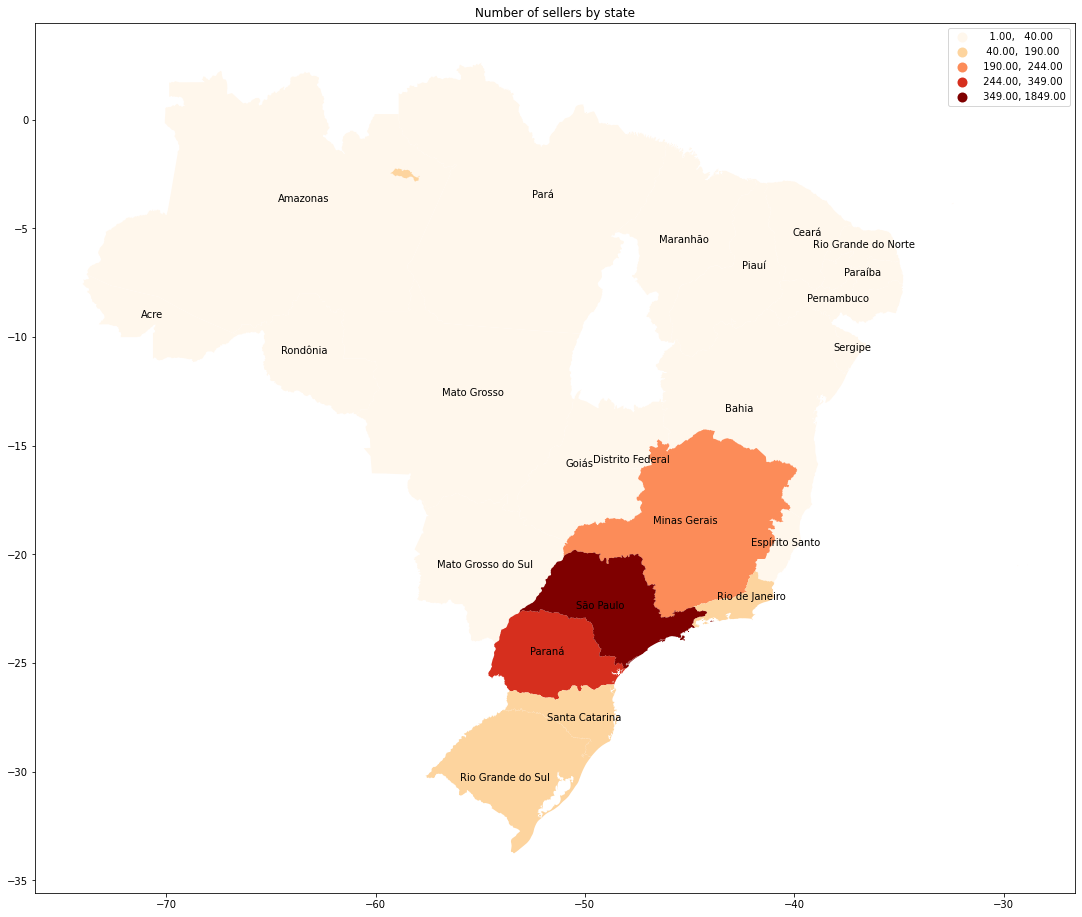

In [83]:
#Visualizing sellers by state
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
#defining the figure to create
fig, ax = plt.subplots(1, 1,figsize=(20, 16))
#Joining geometries and number of sellers
seller_state = pd.DataFrame(sellers.groupby("seller_state").count()["seller_id"])
seller_customers=locations.merge(seller_state,left_on="STATE",right_on="seller_state")
#Defining coords for set the label on each state
seller_customers["coords"] = seller_customers["geometry"].apply(lambda x: x.representative_point().coords[:])
seller_customers["coords"] = [coords[0] for coords in seller_customers["coords"]]
#Plotting data
seller_customers.plot(column='seller_id',ax=ax, cmap='OrRd', scheme='natural_breaks',
           legend=True)
ax.set_title("Number of sellers by state")
for idx, row in seller_customers.iterrows():
    ax.annotate(row['NAME'], xy=row["coords"], horizontalalignment="center", color="black")

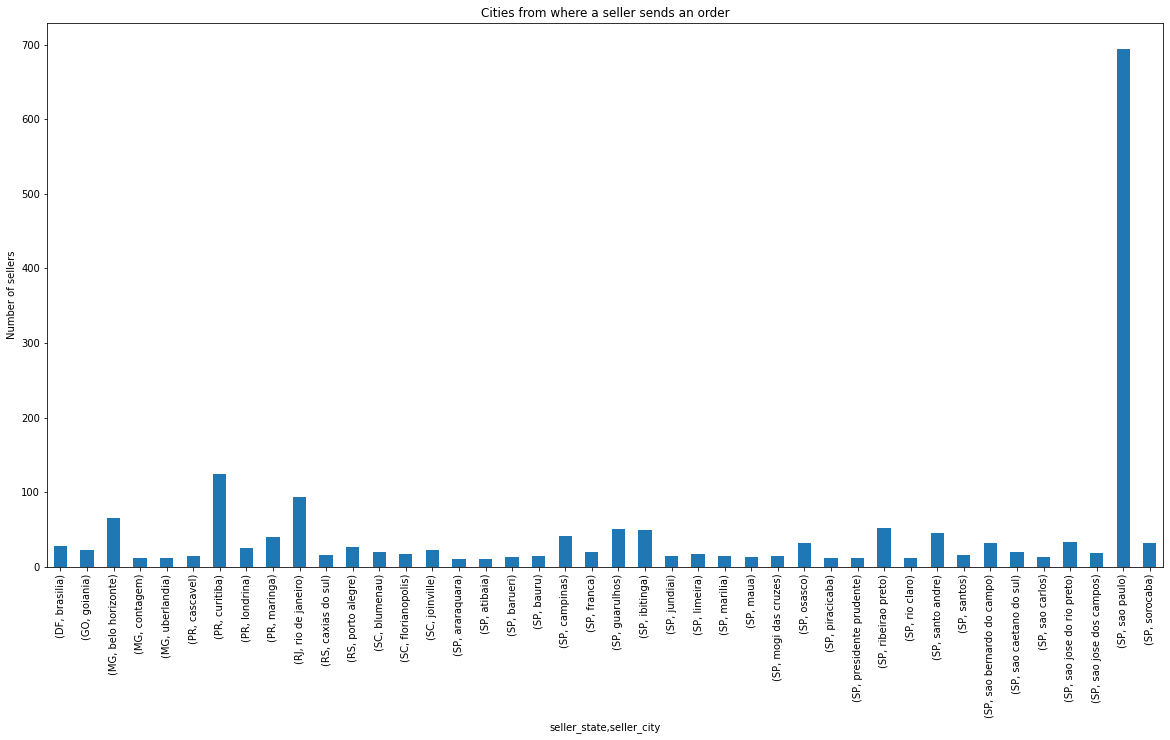

In [151]:
#Visualizing sellers by city
sellers_city_state= sellers.groupby(["seller_state","seller_city"]).count()
sellers_city_state.loc[sellers_city_state["seller_id"]>10]["seller_id"].plot.bar(title="Cities from where a seller sends an order",ylabel="Number of sellers",figsize=(20, 10))


It is interesting because we also have the state of SP and the city of Sao Paulo with more sellers as well as buyers, however the second city with more sellers is Curitiba, which is also where the location of Olist.

<a name="next"></a>
# **Next steps**

There is still a lot of data to view. Is it possible that the value of the orders follows this same distribution? What is the satisfaction of users with their purchases?
